# Prep Devangari Data

I want to save my devangari fonts as single images like Capitals64.

In [6]:
import numpy as np
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import os

In [3]:
im = io.imread('./Capitals64/train/Arimo-Regular.0.0.png')

(64, 1664)


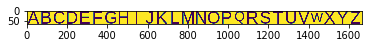

In [7]:
print(im.shape)
plt.imshow(im)

That's our target. Now let's loop over our fonts.

In [39]:
font_to_png_list = {}
letter_order= []
root_dir = './devangari_fonts/devanagari/'
for letter in os.listdir(root_dir):
    if letter not in letter_order: letter_order.append(letter)
    for font in os.listdir(root_dir + letter):
        font_name = font.split('_')[1].split('.')[0]
        if font_name not in font_to_png_list:
            font_to_png_list[font_name] = {}
        font_to_png_list[font_name][letter] = root_dir + letter + '/' + font

In [40]:
root_dir = './devangari_fonts/uppercase_latin/'

for letter in os.listdir(root_dir):
    if letter not in letter_order: letter_order.append(letter)
    for font in os.listdir(root_dir + letter):
        font_name = font.split('_')[1].split('.')[0]
        if font_name not in font_to_png_list:
            font_to_png_list[font_name] = {}
        font_to_png_list[font_name][letter] = root_dir + letter + '/' + font

In [41]:
letter_order.sort()
print(letter_order)

out_dir = './devangari_fonts/full_fonts/'
train_dir = out_dir + 'train/'
valid_dir = out_dir + 'valid/'

font_order = list(font_to_png_list.keys())
np.random.shuffle(font_order)

for d in (out_dir, train_dir, valid_dir):
    if not os.path.exists(d):
        os.mkdir(d)
for i in range(len(font_order)):
    font = font_order[i]
    print(font)
    d = font_to_png_list[font]
    full_im = None
    for letter in letter_order:
        im = io.imread(d[letter])
        if full_im is None:
            full_im = im
        else:
            full_im = np.concatenate([full_im, im], axis=1)
    if i < 10:
        io.imsave(valid_dir + font + '.png', full_im)
    else:
        io.imsave(train_dir + font + '.png', full_im)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह']
Halant-Medium
Eczar-Bold
Poppins-Bold
Eczar-SemiBold
Poppins-ExtraBold
Eczar-Medium
Biryani-ExtraBold
Poppins-SemiBold
InknutAntiqua-Black
Poppins-Italic
Poppins-Light
Poppins-ExtraLightItalic
Arya-Bold
Poppins-SemiBoldItalic
Amiko-SemiBold
Poppins-Black
Biryani-SemiBold
Amita-Bold
Baloo-Regular
Halant-Light
InknutAntiqua-Regular
InknutAntiqua-SemiBold
Poppins-BlackItalic
Cambay-Regular
Halant-SemiBold
Asar-Regular
Poppins-BoldItalic
Poppins-Thin
NotoSans-Italic
Hind-SemiBold
Poppins-Medium
Cambay-BoldItalic
Halant-Bold
Poppins-ThinItalic
Eczar-Regular
Biryani-Light
InknutAntiqua-Light
Arya-Regular
Poppins-MediumItalic
Dekko-Regular
Amiko-Re

In [35]:
len(font_to_png_list)

68

### Prep Capitals64 data like that as well

This serves as a much larger test set

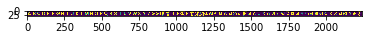

In [17]:
test_im = io.imread('./devangari_fonts/full_fonts/valid/Poppins-SemiBold.png')
test_im.shape
plt.imshow(test_im)

In [51]:
path = './Capitals64/test/'

out_dir = 'Capitals64_resized/'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
out_dir += 'test/'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
for fname in os.listdir(path):
    im = 255 - io.imread(path + fname)
    im_rescaled = skimage.transform.resize(im, (im.shape[0] // 2, im.shape[1] // 2), 
                                           anti_aliasing=True, preserve_range=True)
    im_resized = np.zeros(test_im.shape, dtype='uint64')
    im_resized[:,:im_rescaled.shape[1]] += (im_rescaled).astype('uint64')
    
    io.imsave(out_dir + fname, im_resized)

In [48]:
np.histogram(test_im)

(array([50005,   592,   788,   416,  1120,   842,   388,   422,   573,
        16534]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

### Make a test_dict pkl file

They use a pickled test_dict to control which letters are left in for test runs. I can make it always give all the latin letters.

In [52]:
import pickle

In [63]:
their_dict = pickle.load(open('./Capitals64/test_dict/dict.pkl', 'rb'), encoding='latin1')

In [59]:
my_dict = {}
for key in their_dict.keys():
    my_dict[key] = np.arange(26,70)

In [65]:
if not os.path.exists('./Capitals64_resized/test_dict/'):
    os.mkdir('./Capitals64_resized/test_dict/')
pickle.dump(my_dict, open('./Capitals64_resized/test_dict/dict.pkl', 'wb'), protocol=2)

In [64]:
their_dict

{'gaposiso.0.0.png': array([15, 14,  6, 11, 23,  2,  9, 22, 19,  8, 18, 16,  3, 10,  0,  1, 13,
        20, 24, 17, 21,  7,  5,  4, 12, 25]),
 'Panton-BlackitalicCaps.0.0.png': array([ 3,  2, 16,  9, 23, 24, 19, 25,  4,  7, 22,  8, 13, 14, 17, 11,  0,
        21, 20, 10, 18, 15,  1,  5, 12,  6]),
 'Qokipops free.0.0.png': array([25,  0,  4,  5,  9,  8, 13, 22, 18,  3, 12, 24, 20, 11, 17, 10, 16,
        19,  1,  7,  6,  2, 23, 14, 21, 15]),
 'LibreFranklin-Light.0.0.png': array([15, 19, 13, 14,  3,  7,  5, 12, 25,  0, 20, 24, 18,  8,  2, 11,  9,
        17, 10, 21, 22, 16,  4,  6, 23,  1]),
 'FargoFaroNF.0.0.png': array([ 7, 13, 23,  2, 15, 14, 21, 18,  3,  4,  1, 16, 20,  8, 19,  0, 17,
         5, 24, 10, 22, 11,  9, 25, 12,  6]),
 'RxOO__.0.0.png': array([11,  5, 20, 12,  1,  9,  8, 23,  3, 19,  2, 14,  0, 25, 13, 18, 17,
        22,  7, 16, 21, 24,  6,  4, 15, 10]),
 'inglobalbi.0.0.png': array([ 4,  7, 13, 20, 17, 23, 24, 19, 14,  3,  5,  2, 25, 12,  6,  1, 11,
        10,  8, 16,